In [2]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ","MLPE"]
error = "MAE"
mixture_points = np.linspace(0, 1, 11)[::-1]
#dateexperiment = "2022_06_21_17_38"
dateexperiment = "2022_06_22_14_03"

mean_error_methods = {}

for quant_name in quantificators:
    results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
    #convert to matrix form
    results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
    mean_error_methods[quant_name]=results_mean.mean().mean()
    print("Results for method %s. Mean %s: %f" % (quant_name,error,mean_error_methods[quant_name]))
    cm = sns.light_palette('red', as_cmap=True)
    display(results_mean.style.background_gradient(cmap=cm,low=0,high=1))

Results for method CC. Mean MAE: 0.026949


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.020532,0.025192,0.034720,0.043972,0.050560,0.063968,0.067764,0.081096,0.095012,0.102900,0.110392
0.100000,0.017404,0.016764,0.021296,0.022896,0.022608,0.027324,0.026208,0.031308,0.035988,0.038588,0.039352
0.200000,0.020364,0.019672,0.023560,0.023972,0.023468,0.027128,0.027072,0.030192,0.033472,0.035476,0.036720
0.300000,0.015592,0.014348,0.017024,0.017132,0.015280,0.017880,0.017452,0.019392,0.020940,0.023208,0.022716
0.400000,0.015940,0.015216,0.017992,0.017388,0.017456,0.019272,0.020660,0.021916,0.024416,0.027100,0.027184
0.500000,0.022600,0.021168,0.023580,0.023224,0.022412,0.024024,0.024036,0.026248,0.028628,0.031328,0.030368
0.600000,0.017088,0.016720,0.018136,0.017540,0.016420,0.018368,0.017848,0.020408,0.020328,0.022476,0.021532
0.700000,0.015028,0.015312,0.015848,0.016100,0.015908,0.016584,0.016692,0.018676,0.019212,0.020320,0.021372
0.800000,0.021524,0.021020,0.020776,0.021164,0.019184,0.020244,0.020376,0.021100,0.021212,0.023428,0.022564


Results for method ACC. Mean MAE: 0.034756


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.020702,0.025632,0.041241,0.054089,0.063963,0.083795,0.091559,0.111147,0.132638,0.145831,0.158122
0.100000,0.021000,0.019788,0.026481,0.028616,0.029853,0.038950,0.041262,0.048187,0.059885,0.064374,0.066870
0.200000,0.023525,0.023106,0.023733,0.023804,0.021608,0.025675,0.026670,0.030195,0.035327,0.036366,0.036614
0.300000,0.020659,0.020500,0.022030,0.021960,0.021022,0.022584,0.023577,0.025779,0.028175,0.028836,0.031155
0.400000,0.018811,0.019525,0.019173,0.018671,0.018772,0.019466,0.021439,0.020603,0.023829,0.024293,0.025267
0.500000,0.020478,0.023132,0.022269,0.021215,0.021331,0.020890,0.023186,0.024711,0.025380,0.025958,0.027831
0.600000,0.028044,0.028661,0.027733,0.023724,0.023281,0.023711,0.023451,0.022450,0.022203,0.020705,0.023300
0.700000,0.033443,0.032659,0.031078,0.026490,0.026648,0.023316,0.023355,0.020432,0.020395,0.017675,0.020784
0.800000,0.036341,0.034947,0.033403,0.030320,0.029015,0.026852,0.025182,0.023167,0.021651,0.019749,0.022747


Results for method PCC. Mean MAE: 0.017026


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.015324,0.018432,0.024438,0.031539,0.034518,0.044380,0.046293,0.056240,0.064049,0.070476,0.074280
0.100000,0.012100,0.012165,0.013944,0.014490,0.014077,0.015787,0.016140,0.018395,0.020913,0.022035,0.021374
0.200000,0.010277,0.010179,0.011037,0.011112,0.009675,0.011156,0.011148,0.012681,0.013761,0.013501,0.013111
0.300000,0.011336,0.010914,0.011352,0.011071,0.010998,0.010987,0.011375,0.012198,0.012627,0.011825,0.011535
0.400000,0.009210,0.009754,0.010354,0.010042,0.009956,0.010904,0.011767,0.011855,0.013863,0.014362,0.013689
0.500000,0.009526,0.010270,0.011003,0.010012,0.009943,0.010212,0.010842,0.010670,0.011863,0.011889,0.011422
0.600000,0.009660,0.010329,0.011209,0.010348,0.009026,0.010088,0.010698,0.011608,0.012457,0.011545,0.011576
0.700000,0.015510,0.016387,0.015858,0.015494,0.015195,0.015386,0.015952,0.016002,0.016387,0.015994,0.016342
0.800000,0.010596,0.011475,0.010000,0.009943,0.009634,0.010133,0.011081,0.010963,0.011284,0.011198,0.011535


Results for method PACC. Mean MAE: 0.032448


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.019221,0.024614,0.038920,0.051556,0.059852,0.080779,0.085882,0.104299,0.127548,0.138534,0.150652
0.100000,0.020040,0.019540,0.023073,0.022389,0.022584,0.026772,0.027078,0.029582,0.035390,0.036099,0.038133
0.200000,0.020083,0.018375,0.021978,0.019955,0.017931,0.023699,0.022952,0.026673,0.031775,0.031288,0.033250
0.300000,0.022572,0.022198,0.023698,0.022477,0.020867,0.023970,0.024201,0.025396,0.028576,0.030107,0.031361
0.400000,0.021838,0.021970,0.021985,0.020008,0.019630,0.021343,0.022564,0.023579,0.025927,0.027902,0.029678
0.500000,0.024323,0.024726,0.022854,0.021295,0.020971,0.021068,0.021330,0.022491,0.026172,0.028096,0.029401
0.600000,0.020952,0.021771,0.021494,0.020357,0.020221,0.019995,0.021059,0.020349,0.019122,0.018038,0.020889
0.700000,0.030197,0.028699,0.027101,0.022652,0.022521,0.021600,0.021530,0.022626,0.021860,0.023415,0.026774
0.800000,0.030236,0.029980,0.027808,0.024754,0.024551,0.022427,0.022260,0.020336,0.019209,0.018919,0.021373


Results for method HDy. Mean MAE: 0.046021


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.024494,0.031376,0.055148,0.073970,0.086707,0.122215,0.139739,0.170033,0.205870,0.236234,0.268817
0.100000,0.018575,0.017327,0.024170,0.029807,0.033638,0.054435,0.063992,0.082659,0.107268,0.125382,0.140736
0.200000,0.021494,0.019038,0.021394,0.026677,0.028271,0.045109,0.052010,0.065541,0.086561,0.099771,0.109815
0.300000,0.022887,0.019452,0.019177,0.020165,0.019617,0.025894,0.030390,0.034857,0.045692,0.049536,0.054749
0.400000,0.025644,0.024049,0.022603,0.020903,0.019563,0.021089,0.023353,0.024372,0.030962,0.034174,0.036080
0.500000,0.024585,0.022236,0.021223,0.019296,0.018568,0.018657,0.021328,0.020933,0.024698,0.025998,0.027738
0.600000,0.043788,0.039675,0.037149,0.030867,0.028520,0.024684,0.027410,0.025622,0.023415,0.022857,0.027832
0.700000,0.045226,0.036607,0.031655,0.026464,0.024071,0.021576,0.023951,0.022350,0.019970,0.019637,0.026000
0.800000,0.050025,0.044657,0.039012,0.033444,0.030507,0.027443,0.028485,0.024723,0.020956,0.020049,0.025512


Results for method EMQ. Mean MAE: 0.029948


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.016116,0.021987,0.037640,0.052954,0.063142,0.089122,0.099360,0.127761,0.156746,0.180841,0.202746
0.100000,0.013868,0.013816,0.018360,0.019121,0.018632,0.025912,0.026874,0.034472,0.045594,0.050776,0.051728
0.200000,0.013420,0.013950,0.016214,0.015949,0.014560,0.017148,0.018304,0.019664,0.024800,0.024088,0.023921
0.300000,0.014505,0.014640,0.016076,0.015756,0.015907,0.015768,0.017991,0.018038,0.020670,0.018423,0.018990
0.400000,0.013928,0.015102,0.014944,0.014273,0.014230,0.014844,0.017322,0.017079,0.022166,0.021904,0.022178
0.500000,0.014942,0.016215,0.015814,0.014667,0.014616,0.014817,0.016427,0.016546,0.019694,0.018696,0.018882
0.600000,0.016935,0.019084,0.018199,0.016556,0.016502,0.015979,0.017658,0.016351,0.018045,0.014961,0.016871
0.700000,0.019383,0.021180,0.018812,0.016638,0.017772,0.015782,0.017841,0.016734,0.017639,0.014908,0.016969
0.800000,0.022463,0.023562,0.020508,0.018983,0.019412,0.017486,0.019191,0.016752,0.017449,0.015002,0.016507


Results for method MLPE. Mean MAE: 0.002144


domainA_prop_test,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
domainA_prop_train,,,,,,,,,,,
0.000000,0.002200,0.003120,0.002880,0.001466,0.001165,0.001240,0.001310,0.001221,0.003040,0.003080,0.002760
0.100000,0.002220,0.003140,0.002900,0.001468,0.001164,0.001240,0.001312,0.001224,0.003060,0.003100,0.002780
0.200000,0.002240,0.003160,0.002920,0.001470,0.001163,0.001240,0.001314,0.001227,0.003080,0.003120,0.002800
0.300000,0.002260,0.003180,0.002940,0.001473,0.001162,0.001240,0.001315,0.001230,0.003100,0.003140,0.002820
0.400000,0.002160,0.003080,0.002840,0.001461,0.001166,0.001240,0.001307,0.001214,0.003000,0.003040,0.002720
0.500000,0.002140,0.003060,0.002820,0.001458,0.001167,0.001240,0.001306,0.001211,0.002980,0.003020,0.002700
0.600000,0.002180,0.003100,0.002860,0.001463,0.001166,0.001240,0.001309,0.001218,0.003020,0.003060,0.002740
0.700000,0.002180,0.003100,0.002860,0.001463,0.001166,0.001240,0.001309,0.001218,0.003020,0.003060,0.002740
0.800000,0.002240,0.003160,0.002920,0.001470,0.001163,0.001240,0.001314,0.001227,0.003080,0.003120,0.002800


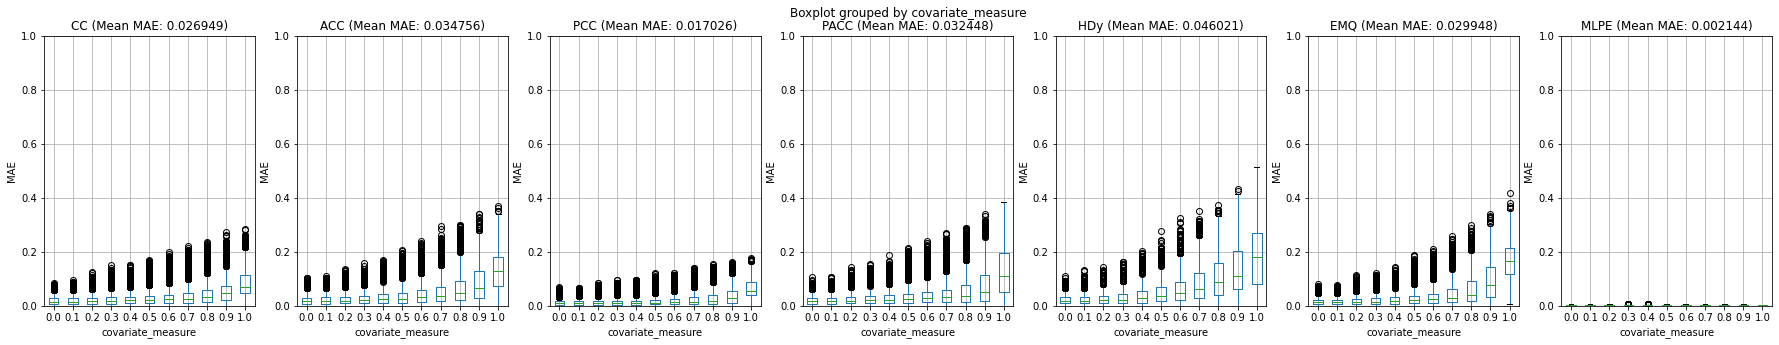

In [3]:
fig, ax = plt.subplots(1,len(quantificators),figsize=(30,5))

for k,quant_name in enumerate(quantificators):
    results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['covariate_measure'] = abs(results['domainA_prop_train']-results['domainA_prop_test'])
    results['covariate_measure'] = results['covariate_measure'].round(1)
    ax[k].set_ylim(0, 1)
    ax[k].set_ylabel(error)
    fig.tight_layout()
    results.boxplot(ax=ax[k],column='error',by='covariate_measure')
    ax[k].set_title("%s (Mean %s: %f)"  % (quant_name,error,mean_error_methods[quant_name]))